# Final Project, Part 3: Exploratory Data Analysis

## Analysis of training factors and 10km road race result

To begin with we import the python packages that we will need and our raw csv data.

In [377]:
# import required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [378]:
# import the raw data from csv files
raw_activities = pd.read_csv('activities.csv')
raw_runners = pd.read_csv('runners.csv')

## Some notes about the data collection

A request was put out by email and social media to runners who raced the Albert Park 10km road race on 22 July 2018. Runner's were asked to export their training GPS data to csv format for the 12 weeks leading up to the race - date range 30/04/2018 - 22/07/2018. Instructions were provided on how to export the data from Garmin Connect which is the most common platform used by runners.

We were able to obtain 28 samples, which is amazing the running community really got behind it. 26 of the samples were csv files from Garmin Connect, 1 manually entered from Strava, and 1 received from an unknown data source. All 28 samples were merged into the one csv file (activities.csv).

Additionally we asked the runner to complete a google form to collect some details such as gender, age, training age, result, and rating of their result. This data is in the csv file runners.csv.

### Issues noted during data collection

AthleteID 1 - data entered from strava, does not have as many fields available as those from Garmin Connect

AthleteID 5 - does not record warm up or cool down on Tues and Thurs. Need to insert dummy data of 2 x 3km at 5:00/km on Tuesdays and 2 x 2.5km at 5:00/km on Thursdays.

AthleteID 15 - data received in a different format - distance is in meters, no time of workout, time is a decimal (hours), cadence needs to be doubled

## Part 1 - Activities Data

In [379]:
# preview the activities data
raw_activities.head()

,AthleteID,Activity Type,Date,Favorite,Title,Distance,Calories,Time,Avg HR,Max HR,...,Max Depth,Bottom Time,Min Water Temp,Gas Type,Surface Interval,Decompression,Weight,Current,Surface Conditions,Water Type
0,1,walk,22/7/18 14:14,FALSE,Afternoon Walk,2.72,100,0:34:47,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,running,22/7/18 9:58,FALSE,Cool Down,2.68,151,0:13:40,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,running,22/7/18 8:59,FALSE,ALBERT PARK!!! PB!!!,10,556,0:37:27,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,running,22/7/18 8:34,NaN,Warm Up,1.77,97,0:10:13,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,running,21/7/18 13:24,NaN,Afternoon Run,6.35,360,0:30:00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Drop irrelevant fields

From completing our data dictionary in part 2 of the project, we are aware that there are many data fields from the Garmin Connect export many that are not relevant to running at all. We are going to drop the completely irrelevant fields early rather than worrying about handling their data types.

In [380]:
# As you can see we have a lot of columns
# We are going to drop columns early that we know we will definitely not use, not running related at all
raw_activities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 43 columns):
AthleteID                    3683 non-null int64
Activity Type                3683 non-null object
Date                         3683 non-null object
Favorite                     3240 non-null object
Title                        3683 non-null object
Distance                     3683 non-null object
Calories                     3392 non-null object
Time                         3683 non-null object
Avg HR                       3504 non-null object
Max HR                       3505 non-null object
Aerobic TE                   3238 non-null float64
Avg Run Cadence              3527 non-null object
Max Run Cadence              3238 non-null object
Avg Pace                     3392 non-null object
Best Pace                    3238 non-null object
Elev Gain                    3390 non-null object
Elev Loss                    3238 non-null object
Avg Stride Length            3238 non-null 

In [381]:
# Drop columns that aren't required
activities = raw_activities.iloc[:,0:22]
activities = activities.drop(['Favorite'],axis=1)
activities.head()

,AthleteID,Activity Type,Date,Title,Distance,Calories,Time,Avg HR,Max HR,Aerobic TE,...,Max Run Cadence,Avg Pace,Best Pace,Elev Gain,Elev Loss,Avg Stride Length,Avg Vertical Ratio,Avg Vertical Oscillation,Avg Ground Contact Time,Avg GCT Balance
0,1,walk,22/7/18 14:14,Afternoon Walk,2.72,100,0:34:47,NaN,NaN,NaN,...,NaN,12:45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,running,22/7/18 9:58,Cool Down,2.68,151,0:13:40,NaN,NaN,NaN,...,NaN,5:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,running,22/7/18 8:59,ALBERT PARK!!! PB!!!,10,556,0:37:27,NaN,NaN,NaN,...,NaN,3:43,NaN,35,NaN,NaN,NaN,NaN,NaN,NaN
3,1,running,22/7/18 8:34,Warm Up,1.77,97,0:10:13,NaN,NaN,NaN,...,NaN,5:45,NaN,9,NaN,NaN,NaN,NaN,NaN,NaN
4,1,running,21/7/18 13:24,Afternoon Run,6.35,360,0:30:00,NaN,NaN,NaN,...,NaN,4:43,NaN,85,NaN,NaN,NaN,NaN,NaN,NaN


### Insert missing data for AthleteID 5

In [382]:
# before doing anything else we will resolve some issues already known from collecting the data
# Issue 1 - AthleteID 5 does not record her warm ups or cool downs on tuesday or thursdays. 
# We know that the runner on average completes a total of 6km on tuesdays and 5km on thursdays at an average pace of 5:00/km

# Generate a list of dates for every Tuesday and Thursday in the 12 week period
ath5_tuesdays = pd.date_range('20180501',periods=12,freq='7D')
ath5_tuesdays.format(formatter=lambda x: x.strftime('%Y%m%d'))

ath5_thursdays = pd.date_range('20180503',periods=12,freq='7D')
ath5_thursdays.format(formatter=lambda x: x.strftime('%Y%m%d'))

# Generate our missing data (I'm sure there is an easier way to do this but this was the best I could figure out)

missing_data_thurswu = pd.DataFrame([np.repeat([5],12),np.repeat(['running'],12),ath5_thursdays,np.repeat(['Warm Up'],12),np.repeat([2.5],12),np.repeat(['0:12:50'],12),np.repeat(['5:00'],12),np.repeat([0],12),np.repeat([0],12)])
missing_data_thurswu = missing_data_thurswu.T
missing_data_thurscd = pd.DataFrame([np.repeat([5],12),np.repeat(['running'],12),ath5_thursdays,np.repeat(['Cool Down'],12),np.repeat([2.5],12),np.repeat(['0:12:50'],12),np.repeat(['5:00'],12),np.repeat([0],12),np.repeat([0],12)])
missing_data_thurscd = missing_data_thurscd.T
missing_data_tueswu = pd.DataFrame([np.repeat([5],12),np.repeat(['running'],12),ath5_tuesdays,np.repeat(['Warm Up'],12),np.repeat([3],12),np.repeat(['0:15:00'],12),np.repeat(['5:00'],12),np.repeat([0],12),np.repeat([0],12)])
missing_data_tueswu = missing_data_tueswu.T
missing_data_tuescd = pd.DataFrame([np.repeat([5],12),np.repeat(['running'],12),ath5_tuesdays,np.repeat(['Cool Down'],12),np.repeat([3],12),np.repeat(['0:15:00'],12),np.repeat(['5:00'],12),np.repeat([0],12),np.repeat([0],12)])
missing_data_tuescd = missing_data_tuescd.T

# Concatenate into one dataframe
missing_data_athlete5 = pd.concat([missing_data_thurswu, missing_data_thurscd, missing_data_tueswu, missing_data_tuescd])

# Label the column headings
missing_data_athlete5.columns = ['AthleteID', 'Activity Type', 'Date', 'Title', 'Distance', 'Time', 'Avg Pace', 'Elev Gain','Elev Loss']

# Add columns to match main activities dataframe
missing_data_athlete5.insert(loc=5,column='Calories',value=np.nan)
missing_data_athlete5.insert(loc=7,column='Avg HR',value=np.nan)
missing_data_athlete5.insert(loc=8,column='Max HR',value=np.nan)
missing_data_athlete5.insert(loc=9,column='Aerobic TE',value=np.nan)
missing_data_athlete5.insert(loc=10,column='Avg Run Cadence',value=np.nan)
missing_data_athlete5.insert(loc=11,column='Max Run Cadence',value=np.nan)
missing_data_athlete5.insert(loc=13,column='Best Pace',value=np.nan)
missing_data_athlete5.insert(loc=16,column='Avg Stride Length',value=np.nan)
missing_data_athlete5.insert(loc=17,column='Avg Vertical Ratio',value=np.nan)
missing_data_athlete5.insert(loc=18,column='Avg Vertical Oscillation',value=np.nan)
missing_data_athlete5.insert(loc=19,column='Avg Ground Contact Time',value=np.nan)
missing_data_athlete5.insert(loc=20,column='Avg GCT Balance',value=np.nan)

missing_data_athlete5.head()

,AthleteID,Activity Type,Date,Title,Distance,Calories,Time,Avg HR,Max HR,Aerobic TE,...,Max Run Cadence,Avg Pace,Best Pace,Elev Gain,Elev Loss,Avg Stride Length,Avg Vertical Ratio,Avg Vertical Oscillation,Avg Ground Contact Time,Avg GCT Balance
0,5,running,2018-05-03 00:00:00,Warm Up,2.5,NaN,0:12:50,NaN,NaN,NaN,...,NaN,5:00,NaN,0,0,NaN,NaN,NaN,NaN,NaN
1,5,running,2018-05-10 00:00:00,Warm Up,2.5,NaN,0:12:50,NaN,NaN,NaN,...,NaN,5:00,NaN,0,0,NaN,NaN,NaN,NaN,NaN
2,5,running,2018-05-17 00:00:00,Warm Up,2.5,NaN,0:12:50,NaN,NaN,NaN,...,NaN,5:00,NaN,0,0,NaN,NaN,NaN,NaN,NaN
3,5,running,2018-05-24 00:00:00,Warm Up,2.5,NaN,0:12:50,NaN,NaN,NaN,...,NaN,5:00,NaN,0,0,NaN,NaN,NaN,NaN,NaN
4,5,running,2018-05-31 00:00:00,Warm Up,2.5,NaN,0:12:50,NaN,NaN,NaN,...,NaN,5:00,NaN,0,0,NaN,NaN,NaN,NaN,NaN


In [383]:
# Add the missing data to the main activities dataset
activities = pd.concat([activities,missing_data_athlete5],sort=False,ignore_index=True)

### Investigate data types

Including fixing dodgy data

In [384]:
# We need to fix some data types
activities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3731 entries, 0 to 3730
Data columns (total 21 columns):
AthleteID                   3731 non-null object
Activity Type               3731 non-null object
Date                        3731 non-null object
Title                       3731 non-null object
Distance                    3731 non-null object
Calories                    3392 non-null object
Time                        3731 non-null object
Avg HR                      3504 non-null object
Max HR                      3505 non-null object
Aerobic TE                  3238 non-null float64
Avg Run Cadence             3527 non-null object
Max Run Cadence             3238 non-null object
Avg Pace                    3440 non-null object
Best Pace                   3238 non-null object
Elev Gain                   3438 non-null object
Elev Loss                   3286 non-null object
Avg Stride Length           3238 non-null float64
Avg Vertical Ratio          3238 non-null float64
Avg Vert

#### Replace '--' values (Garmin's version of 0 or null)

In [385]:
# Let's look at some typical Garmin data
activities[(activities['AthleteID'] == 14)].tail()

# For Elev Gain and Elev Loss, -- should be converted to 0
activities['Elev Gain'] = activities['Elev Gain'].mask(activities['Elev Gain'] == '--', 0)
activities['Elev Loss'] = activities['Elev Loss'].mask(activities['Elev Loss'] == '--', 0)

# All other dashes '--' should be converted to null values
activities = activities.replace('--',np.nan)

In [386]:
activities[(activities['AthleteID'] == 14)].tail()

,AthleteID,Activity Type,Date,Title,Distance,Calories,Time,Avg HR,Max HR,Aerobic TE,...,Max Run Cadence,Avg Pace,Best Pace,Elev Gain,Elev Loss,Avg Stride Length,Avg Vertical Ratio,Avg Vertical Oscillation,Avg Ground Contact Time,Avg GCT Balance
1853,14,running,3/5/18 8:23,Melbourne Running,4.37,223,19:48,166,191,0.0,...,199,4:32,2:49,0,1,1.30,0.0,0.0,NaN,NaN
1854,14,running,3/5/18 7:48,Melbourne Running,2.99,163,15:47,145,155,0.0,...,173,5:16,4:23,2,0,1.14,0.0,0.0,NaN,NaN
1855,14,running,2/5/18 8:42,Melbourne Running,10.62,617,55:44:00,150,168,0.0,...,178,5:15,4:44,62,62,1.14,0.0,0.0,NaN,NaN
1856,14,running,1/5/18 10:39,Melbourne Running,2.13,124,10:49,153,162,0.0,...,174,5:04,2:25,0,2,1.19,0.0,0.0,NaN,NaN
1857,14,running,1/5/18 10:01,Melbourne Running,5.48,302,23:08,165,188,0.0,...,200,4:13,2:49,2,3,1.37,0.0,0.0,NaN,NaN


#### Remove commas from our numeric data and convert date to datetime

Date's were a bit of a mess, with Athlete ID 11 and 12 needing to be handled differently. This was identified when we added our Week column further down in the notebook and we ran into issues.

In [387]:
# Remove commas from a number of columns that we want to convert to numeric
activities['Distance'] = activities['Distance'].str.replace(',','')
activities['Calories'] = activities['Calories'].str.replace(',','')
activities['Elev Gain'] = activities['Elev Gain'].str.replace(',','')

# Convert columns to numeric
activities[['AthleteID','Distance','Calories','Avg HR','Max HR','Aerobic TE','Avg Run Cadence','Max Run Cadence','Elev Gain','Elev Loss','Avg Stride Length','Avg Vertical Oscillation','Avg Ground Contact Time']] = activities[['AthleteID','Distance','Calories','Avg HR','Max HR','Aerobic TE','Avg Run Cadence','Max Run Cadence','Elev Gain','Elev Loss','Avg Stride Length','Avg Vertical Oscillation','Avg Ground Contact Time']].apply(pd.to_numeric)

# Convert Date to datetime
# Dates are a little messy, athlete id 11 and 12 had to be handled differently
activities_dayfirstfalse = activities.loc[lambda activities: (activities['AthleteID'] == 11) | (activities['AthleteID'] == 12)]
activities_dayfirsttrue = activities.loc[lambda activities: (activities['AthleteID'] != 11) & (activities['AthleteID'] != 12)]                                    
activities_dayfirstfalse['Date'] = activities_dayfirstfalse['Date'].apply(lambda x: pd.to_datetime(x, dayfirst=False))
activities_dayfirsttrue['Date'] = activities_dayfirsttrue['Date'].apply(lambda x: pd.to_datetime(x, dayfirst=True))
activities = pd.concat([activities_dayfirsttrue,activities_dayfirstfalse],sort=False,ignore_index=True)

/Users/benmudie/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
/Users/benmudie/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [388]:
# Re-check the column data types
activities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3731 entries, 0 to 3730
Data columns (total 21 columns):
AthleteID                   3731 non-null int64
Activity Type               3731 non-null object
Date                        3731 non-null datetime64[ns]
Title                       3731 non-null object
Distance                    3683 non-null float64
Calories                    3378 non-null float64
Time                        3731 non-null object
Avg HR                      2625 non-null float64
Max HR                      2625 non-null float64
Aerobic TE                  3238 non-null float64
Avg Run Cadence             3058 non-null float64
Max Run Cadence             2769 non-null float64
Avg Pace                    3360 non-null object
Best Pace                   3137 non-null object
Elev Gain                   2741 non-null float64
Elev Loss                   3286 non-null float64
Avg Stride Length           3238 non-null float64
Avg Vertical Ratio          3238 non-null f

#### Resolve the known issues for AthleteID 15

Note we needed to fix some of our data types before we could do this, so we could work with numeric data.

In [389]:
# Resolve known issues for data for AthleteID 15
# This data came in a different format to the majority of the data and requires some conversion

# Convert distance from meters to kilometers (divide by 1000)
activities['Distance'] = activities['Distance'].mask(activities['AthleteID'] == 15, activities['Distance'] / 1000)
# Cadence needs to be doubled
activities['Avg Run Cadence'] = activities['Avg Run Cadence'].mask(activities['AthleteID'] == 15, activities['Avg Run Cadence'] * 2)
activities[(activities['AthleteID'] == 15)]

,AthleteID,Activity Type,Date,Title,Distance,Calories,Time,Avg HR,Max HR,Aerobic TE,...,Max Run Cadence,Avg Pace,Best Pace,Elev Gain,Elev Loss,Avg Stride Length,Avg Vertical Ratio,Avg Vertical Oscillation,Avg Ground Contact Time,Avg GCT Balance
1512,15,Bike,2018-04-30,Cycling,4.352000,NaN,0.339795828,77.0,110.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1513,15,Strength,2018-04-30,Strength,0.000000,NaN,1.502983451,112.0,178.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1514,15,Run,2018-04-30,Running,14.865060,NaN,1.122631073,176.0,213.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1515,15,Bike,2018-04-30,Cycling,26.421000,NaN,1.708350301,77.0,193.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1516,15,Bike,2018-05-01,Cycling,24.915000,NaN,1.628172159,84.0,206.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1517,15,Run,2018-05-01,Running,12.093310,NaN,1.022596121,188.0,211.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1518,15,Bike,2018-05-01,Cycling,11.242000,NaN,0.757846951,70.0,136.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1519,15,Run,2018-05-02,Running,16.151000,NaN,1.344361186,187.0,208.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1520,15,Strength,2018-05-02,Strength,0.000000,NaN,1.507136345,128.0,197.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1521,15,Bike,2018-05-03,Cycling,5.224000,NaN,0.230015829,93.0,120.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [390]:
activities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3731 entries, 0 to 3730
Data columns (total 21 columns):
AthleteID                   3731 non-null int64
Activity Type               3731 non-null object
Date                        3731 non-null datetime64[ns]
Title                       3731 non-null object
Distance                    3683 non-null float64
Calories                    3378 non-null float64
Time                        3731 non-null object
Avg HR                      2625 non-null float64
Max HR                      2625 non-null float64
Aerobic TE                  3238 non-null float64
Avg Run Cadence             3058 non-null float64
Max Run Cadence             2769 non-null float64
Avg Pace                    3360 non-null object
Best Pace                   3137 non-null object
Elev Gain                   2741 non-null float64
Elev Loss                   3286 non-null float64
Avg Stride Length           3238 non-null float64
Avg Vertical Ratio          3238 non-null f

#### Convert time into minutes

The time data was a complete mess, in some cases from Garmin Connect it can be 45:00:00 with first value being minutes and in other cases it could be 1:00:00 with the first value being hours. I had to create a function to handle this which took a few attempts. I have one function that works on a string level and an improved version that works on a row level so that I could also check the distance to correctly identify if the first number is hours or minutes. This ended up being a classification problem, classifying what the first number actually is.

In [391]:
# Convert time to time in minutes decimal
# This function is still used later for the runners dataframe
def convert_time_minutes(x):
    if ':' in x:
        result_list = x.split(':')
        # the time data is a complete mess, in some cases it can be 45:00:00 with first value being minutes
        # and in other cases it could be 1:00:00 with the first value being hours.
        # if > 5 we assume first value is minutes
        if int(result_list[0]) > 5:
            result_list[0] = int(result_list[0])
            result_list[1] = float(result_list[1]) / 60
            result = int(result_list[0]) + float(result_list[1])            
            result_list[0] = int(result_list[0]) * 60
            result = int(result_list[0]) + float(result_list[1])
            if len(result_list) > 2:
                result_list[2] = float(result_list[2]) / 60
                result = int(result_list[0]) + float(result_list[1]) + float(result_list[2])
        else:
            result_list[0] = int(result_list[0]) * 60
            result = int(result_list[0]) + float(result_list[1])
            if len(result_list) > 2:
                result_list[2] = float(result_list[2]) / 60
                result = int(result_list[0]) + float(result_list[1]) + float(result_list[2])
    else:
        result = float(x) * 60

    return result

# We will convert time from a string into minutes (numeric) so that we can work with it
# activities['Time'] = activities['Time'].apply(convert_time_minutes).apply(pd.to_numeric)

In [392]:
def convert_time_minutes_v2(row):
    if ':' in row['Time']:
        result_list = row['Time'].split(':')
        # the time data is a complete mess, in some cases it can be 45:00:00 with first value being minutes
        # and in other cases it could be 1:00:00 with the first value being hours.
        # if > 5 we assume first value is minutes
        if (int(result_list[0]) < 5 and row['Distance'] > 4) or int(result_list[0]) == 0:
            result_list[0] = int(result_list[0]) * 60
            result = int(result_list[0]) + float(result_list[1])
            if len(result_list) > 2:
                result_list[2] = float(result_list[2]) / 60
                result = int(result_list[0]) + float(result_list[1]) + float(result_list[2])                   
        else:
            result_list[0] = int(result_list[0])
            result_list[1] = float(result_list[1]) / 60
            result = int(result_list[0]) + float(result_list[1])  
    else:
        result = float(row['Time']) * 60

    return result

time_in_minutes = activities.apply(convert_time_minutes_v2, axis=1)
activities['Time'] = time_in_minutes

In [393]:
activities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3731 entries, 0 to 3730
Data columns (total 21 columns):
AthleteID                   3731 non-null int64
Activity Type               3731 non-null object
Date                        3731 non-null datetime64[ns]
Title                       3731 non-null object
Distance                    3683 non-null float64
Calories                    3378 non-null float64
Time                        3731 non-null float64
Avg HR                      2625 non-null float64
Max HR                      2625 non-null float64
Aerobic TE                  3238 non-null float64
Avg Run Cadence             3058 non-null float64
Max Run Cadence             2769 non-null float64
Avg Pace                    3360 non-null object
Best Pace                   3137 non-null object
Elev Gain                   2741 non-null float64
Elev Loss                   3286 non-null float64
Avg Stride Length           3238 non-null float64
Avg Vertical Ratio          3238 non-null 

#### Pace conversion from mins per km (string) to decimal

We had to calculate pace for AthleteID 15 and convert pace to a decimal number for all other activities

In [394]:
# We can now calculate avg pace per km for AthleteID 15 (was not included in data set)
activities['Avg Pace'] = activities['Avg Pace'].mask(activities['AthleteID'] == 15, activities['Time'] / activities['Distance'])
activities = activities.replace(np.inf,np.nan)

In [395]:
activities[(activities['AthleteID'] == 15)]

,AthleteID,Activity Type,Date,Title,Distance,Calories,Time,Avg HR,Max HR,Aerobic TE,...,Max Run Cadence,Avg Pace,Best Pace,Elev Gain,Elev Loss,Avg Stride Length,Avg Vertical Ratio,Avg Vertical Oscillation,Avg Ground Contact Time,Avg GCT Balance
1512,15,Bike,2018-04-30,Cycling,4.352000,NaN,20.387750,77.0,110.0,NaN,...,NaN,4.68469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1513,15,Strength,2018-04-30,Strength,0.000000,NaN,90.179007,112.0,178.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1514,15,Run,2018-04-30,Running,14.865060,NaN,67.357864,176.0,213.0,NaN,...,NaN,4.53129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1515,15,Bike,2018-04-30,Cycling,26.421000,NaN,102.501018,77.0,193.0,NaN,...,NaN,3.87953,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1516,15,Bike,2018-05-01,Cycling,24.915000,NaN,97.690330,84.0,206.0,NaN,...,NaN,3.92094,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1517,15,Run,2018-05-01,Running,12.093310,NaN,61.355767,188.0,211.0,NaN,...,NaN,5.07353,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1518,15,Bike,2018-05-01,Cycling,11.242000,NaN,45.470817,70.0,136.0,NaN,...,NaN,4.04473,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1519,15,Run,2018-05-02,Running,16.151000,NaN,80.661671,187.0,208.0,NaN,...,NaN,4.99422,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1520,15,Strength,2018-05-02,Strength,0.000000,NaN,90.428181,128.0,197.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1521,15,Bike,2018-05-03,Cycling,5.224000,NaN,13.800950,93.0,120.0,NaN,...,NaN,2.64184,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [396]:
# Convert all other paces to decimal
def convert_pace_decimal(x):
    if ':' in str(x):
        result_list = x.split(':')
        result_list[1] = int(result_list[1]) / 60
        result = float(result_list[0]) + float(result_list[1])
    else:
        result = x

    return result

activities['Avg Pace'] = activities['Avg Pace'].apply(convert_pace_decimal).apply(pd.to_numeric)
activities['Best Pace'] = activities['Best Pace'].apply(convert_pace_decimal).apply(pd.to_numeric)

In [397]:
# We found some strange run activities for AthleteID 14, low distance and very high average pace
activities[(activities['Avg Pace'] > 10) & (activities['AthleteID'] == 14)]

,AthleteID,Activity Type,Date,Title,Distance,Calories,Time,Avg HR,Max HR,Aerobic TE,...,Max Run Cadence,Avg Pace,Best Pace,Elev Gain,Elev Loss,Avg Stride Length,Avg Vertical Ratio,Avg Vertical Oscillation,Avg Ground Contact Time,Avg GCT Balance
1381,14,running,2018-07-18 17:40:00,Melbourne Running,0.85,516.0,45.566667,152.0,166.0,0.0,...,105.0,53.933333,3.683333,1.0,0.0,0.19,0.0,0.0,NaN,NaN
1384,14,running,2018-07-16 17:39:00,Melbourne Running,1.57,642.0,55.666667,153.0,165.0,0.0,...,105.0,35.533333,2.133333,NaN,0.0,0.29,0.0,0.0,NaN,NaN
1388,14,running,2018-07-13 16:33:00,Melbourne Running,0.88,275.0,30.750000,136.0,146.0,0.0,...,105.0,34.933333,2.966667,NaN,0.0,0.29,0.0,0.0,NaN,NaN
1392,14,running,2018-07-11 17:57:00,Melbourne Running,1.01,518.0,45.666667,152.0,172.0,0.0,...,198.0,45.283333,4.516667,NaN,0.0,0.23,0.0,0.0,NaN,NaN
1395,14,running,2018-07-09 18:00:00,Melbourne Running,0.88,549.0,50.566667,148.0,169.0,0.0,...,123.0,57.466667,6.683333,NaN,0.0,0.18,0.0,0.0,NaN,NaN
1404,14,running,2018-07-04 17:54:00,Melbourne Running,0.84,405.0,40.800000,142.0,158.0,0.0,...,104.0,48.883333,7.266667,NaN,0.0,0.21,0.0,0.0,NaN,NaN
1407,14,running,2018-07-02 17:59:00,Melbourne Running,0.57,311.0,30.550000,144.0,156.0,0.0,...,104.0,53.416667,6.166667,NaN,0.0,0.19,0.0,0.0,NaN,NaN
1416,14,running,2018-06-27 16:57:00,Melbourne Running,0.73,498.0,40.616667,158.0,177.0,0.0,...,210.0,55.933333,5.400000,NaN,0.0,0.17,0.0,0.0,NaN,NaN
1420,14,running,2018-06-25 18:53:00,Melbourne Running,0.57,192.0,20.866667,138.0,147.0,0.0,...,104.0,36.800000,7.633333,NaN,0.0,0.28,0.0,0.0,NaN,NaN
1429,14,running,2018-06-20 17:51:00,Melbourne Running,0.93,554.0,47.083333,155.0,171.0,0.0,...,213.0,50.816667,5.250000,NaN,0.0,0.19,0.0,0.0,NaN,NaN


In [398]:
# We will drop these as the high pace is throwing things out
# Note we may come back and convert these to cross training, however for now just removing
activities.drop(activities[(activities['Avg Pace'] > 10) & (activities['AthleteID'] == 14)].index, inplace=True)

In [399]:
activities.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3708 entries, 0 to 3730
Data columns (total 21 columns):
AthleteID                   3708 non-null int64
Activity Type               3708 non-null object
Date                        3708 non-null datetime64[ns]
Title                       3708 non-null object
Distance                    3660 non-null float64
Calories                    3355 non-null float64
Time                        3708 non-null float64
Avg HR                      2602 non-null float64
Max HR                      2602 non-null float64
Aerobic TE                  3215 non-null float64
Avg Run Cadence             3035 non-null float64
Max Run Cadence             2746 non-null float64
Avg Pace                    3591 non-null float64
Best Pace                   3114 non-null float64
Elev Gain                   2739 non-null float64
Elev Loss                   3263 non-null float64
Avg Stride Length           3215 non-null float64
Avg Vertical Ratio          3215 non-nul

In [400]:
# We should also drop Avg Ground Contact Time and Avg GCT Balance with so little data - 72 and 70 non-null records
activities = activities.drop(['Avg Ground Contact Time'],axis=1)
activities = activities.drop(['Avg GCT Balance'],axis=1)

In [401]:
activities.describe()

,AthleteID,Distance,Calories,Time,Avg HR,Max HR,Aerobic TE,Avg Run Cadence,Max Run Cadence,Avg Pace,Best Pace,Elev Gain,Elev Loss,Avg Stride Length,Avg Vertical Ratio,Avg Vertical Oscillation
count,3708.000000,3660.000000,3355.000000,3708.000000,2602.000000,2602.000000,3215.000000,3035.000000,2746.000000,3591.000000,3114.000000,2739.000000,3263.000000,3215.000000,3215.000000,3215.000000
mean,14.197950,11.606854,345.250969,32.158680,139.223674,162.480015,1.223608,170.907414,192.631464,6.077877,5.613819,43.990142,26.015936,0.998473,0.164292,0.217107
std,7.610329,114.909603,326.363770,27.198146,23.018153,22.912933,1.397306,21.633894,18.831465,5.180114,9.034346,105.128102,49.642719,0.480979,1.115382,1.437239
min,1.000000,0.000000,0.000000,0.000000,60.000000,62.000000,0.000000,1.000000,117.000000,0.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,2.042843,121.000000,12.183333,131.000000,150.000000,0.000000,168.000000,183.000000,4.450000,3.200000,6.000000,2.000000,0.980000,0.000000,0.000000
50%,14.000000,4.166000,224.000000,22.375000,143.000000,164.000000,0.000000,174.000000,191.000000,4.966667,3.983333,16.000000,9.000000,1.130000,0.000000,0.000000
75%,20.000000,9.842500,488.000000,45.133333,153.000000,176.000000,2.400000,181.000000,200.750000,5.416667,4.600000,41.000000,27.000000,1.270000,0.000000,0.000000
max,28.000000,3000.000000,3255.000000,192.500000,193.000000,232.000000,5.000000,215.000000,256.000000,56.116667,90.400000,2118.000000,928.000000,7.760000,10.900000,11.700000


## Part 2 - Runners Data

In [402]:
# Now let's look at the runners table
raw_runners.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 10 columns):
AthleteID                  28 non-null int64
Email                      28 non-null object
Name                       28 non-null object
Gender                     28 non-null object
Age                        28 non-null int64
Training Age               28 non-null int64
Albert Park 10km Result    28 non-null object
Result Self Rating         28 non-null int64
Data source                28 non-null object
Notes                      2 non-null object
dtypes: int64(4), object(6)
memory usage: 2.3+ KB


In [403]:
# Pretty good, let's drop email and name for privacy reasons
runners = raw_runners.drop(['Email','Name'],axis=1)
runners.head()

,AthleteID,Gender,Age,Training Age,Albert Park 10km Result,Result Self Rating,Data source,Notes
0,1,Female,21,6,0:37:26,5,Strava,NaN
1,2,Female,53,6,1:05:07,3,Garmin Connect,NaN
2,3,Male,20,7,0:31:18,2,Garmin Connect,NaN
3,4,Male,41,6,0:34:37,5,Garmin Connect,NaN
4,5,Female,29,15,0:37:43,4,Garmin Connect,Doesn't record warm up/cool down on Tues and T...


In [404]:
# We will do the same conversion on the race result from time to decimal in minutes
runners['Albert Park 10km Result'] = runners['Albert Park 10km Result'].apply(convert_time_minutes).apply(pd.to_numeric)
runners.head()

,AthleteID,Gender,Age,Training Age,Albert Park 10km Result,Result Self Rating,Data source,Notes
0,1,Female,21,6,37.433333,5,Strava,NaN
1,2,Female,53,6,65.116667,3,Garmin Connect,NaN
2,3,Male,20,7,31.300000,2,Garmin Connect,NaN
3,4,Male,41,6,34.616667,5,Garmin Connect,NaN
4,5,Female,29,15,37.716667,4,Garmin Connect,Doesn't record warm up/cool down on Tues and T...


### Back to Activities

More work required to be able to aggregate data for each runner

In [405]:
# Back to activities let's classify whether the activity is a run or not a run
activities['Activity Type'].unique()

array(['walk', 'running', 'other', 'cycling', 'strength_training',
       'lap_swimming', 'indoor_cycling', 'walking', 'treadmill_running',
       'fitness_equipment', 'virtual_ride', 'street_running',
       'road_biking', 'track_running', 'trail_running', 'Bike',
       'Strength', 'Run', 'Swim', 'Rowing', 'casual_walking', 'yoga',
       'rc_drone', 'stop_watch'], dtype=object)

In [406]:
# Function to classify activities as a run or other activity
def run_classify(x):
    if x == 'running' or x == 'treadmill_running' or x == 'street_running' or x == 'track_running' or x == 'trail_running' or x == 'Run':
        result = 1
    else:
        result = 0
    return result

activities['IsRun'] = activities['Activity Type'].apply(run_classify)

#### Identifying training weeks

This is an important step so that we can do some summarising per training week. Runner's are very familiar with training weeks.

In [407]:
import datetime as dt

# Next let's add a week column so that we can group by weeks
def week_group(x):
    if x >= dt.datetime(2018, 4, 30, 0):
        result = 1
        if x >= dt.datetime(2018, 5, 7, 0):
            result = 2
            if x >= dt.datetime(2018, 5, 14, 0):
                result = 3
                if x >= dt.datetime(2018, 5, 21, 0):
                    result = 4
                    if x >= dt.datetime(2018, 5, 28, 0):
                        result = 5
                        if x >= dt.datetime(2018, 6, 4, 0):
                            result = 6
                            if x >= dt.datetime(2018, 6, 11, 0):
                                result = 7
                                if x >= dt.datetime(2018, 6, 18, 0):
                                    result = 8
                                    if x >= dt.datetime(2018, 6, 25, 0):
                                        result = 9
                                        if x >= dt.datetime(2018, 7, 2, 0):
                                            result = 10
                                            if x >= dt.datetime(2018, 7, 9, 0):
                                                result = 11
                                                if x >= dt.datetime(2018, 7, 16, 0):
                                                    result = 12
    else:
        result = np.nan
    return result

activities['Week'] = activities['Date'].apply(week_group)

In [408]:
activities.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3708 entries, 0 to 3730
Data columns (total 21 columns):
AthleteID                   3708 non-null int64
Activity Type               3708 non-null object
Date                        3708 non-null datetime64[ns]
Title                       3708 non-null object
Distance                    3660 non-null float64
Calories                    3355 non-null float64
Time                        3708 non-null float64
Avg HR                      2602 non-null float64
Max HR                      2602 non-null float64
Aerobic TE                  3215 non-null float64
Avg Run Cadence             3035 non-null float64
Max Run Cadence             2746 non-null float64
Avg Pace                    3591 non-null float64
Best Pace                   3114 non-null float64
Elev Gain                   2739 non-null float64
Elev Loss                   3263 non-null float64
Avg Stride Length           3215 non-null float64
Avg Vertical Ratio          3215 non-nul

#### Aggregating running data

In [409]:
# Summary of running data - average total per week for each runner
runs_weeklyaverage = activities[(activities['IsRun'] == 1)].groupby(by=['AthleteID','Week'],as_index=False).sum().groupby(['AthleteID'], as_index=False).mean()
runs_weeklyaverage = runs_weeklyaverage[['AthleteID','Distance','Time','Elev Gain','Elev Loss']]
runs_weeklyaverage

,AthleteID,Distance,Time,Elev Gain,Elev Loss
0,1,84.180833,414.013889,1270.500000,0.000000
1,2,20.385833,173.346111,90.500000,88.333333
2,3,72.073333,312.822222,338.916667,337.750000
3,4,113.564167,538.052500,430.750000,479.583333
4,5,39.784167,233.135278,277.333333,275.500000
5,6,61.570833,311.312222,218.833333,226.916667
6,7,34.975833,214.612500,139.666667,154.916667
7,8,52.523333,245.824167,157.750000,167.583333
8,9,71.275000,358.107500,254.500000,260.916667
9,10,60.672500,285.432917,214.583333,198.750000


In [410]:
# Summary of running data - activity average per runner
runs_average = activities[(activities['IsRun'] == 1)].groupby(['AthleteID'], as_index=False).mean()
# drop IsRun and Week columns
runs_average = runs_average.iloc[:,0:16] 
runs_average

,AthleteID,Distance,Calories,Time,Avg HR,Max HR,Aerobic TE,Avg Run Cadence,Max Run Cadence,Avg Pace,Best Pace,Elev Gain,Elev Loss,Avg Stride Length,Avg Vertical Ratio,Avg Vertical Oscillation
0,1,6.825473,205.344595,33.568694,NaN,NaN,NaN,176.452703,NaN,4.907770,NaN,103.714286,NaN,NaN,NaN,NaN
1,2,2.496224,167.285714,21.226054,137.030612,154.000000,2.160204,178.010204,189.459184,6.943027,5.963776,17.238095,10.816327,0.826633,0.000000,0.000000
2,3,10.547317,750.878049,45.778862,148.000000,165.000000,0.000000,171.109756,192.243902,4.405488,3.148171,50.209877,49.426829,1.343171,0.000000,0.000000
3,4,7.699266,452.084746,36.478136,139.493421,156.467105,2.206215,185.268571,202.857143,4.863936,3.802571,31.518293,32.514124,1.115028,0.000000,0.000000
4,5,7.577937,385.841270,25.203814,145.222222,167.777778,2.792063,167.142857,188.634921,4.691892,3.430423,53.677419,29.783784,1.339524,0.000000,0.000000
5,6,6.056148,310.983333,30.620874,142.333333,159.740741,1.814754,167.483051,195.279661,5.398623,3.914846,24.091743,22.319672,1.133033,0.000000,0.000000
6,7,8.229608,570.880000,50.497059,150.862745,173.549020,0.000000,191.820000,211.380000,6.145667,4.408333,47.885714,36.450980,0.836667,0.000000,0.000000
7,8,5.002222,351.595238,23.411825,143.047619,164.317460,0.000000,163.984127,186.023810,4.772667,3.754630,21.269663,15.960317,1.294841,0.000000,0.000000
8,9,6.788095,325.634921,34.105476,144.373016,161.976190,0.000000,166.341270,187.825397,6.077371,4.101587,26.102564,24.849206,1.265873,0.000000,0.000000
9,10,7.208614,499.455446,33.912822,NaN,NaN,0.000000,174.108911,196.247525,4.866502,3.100495,31.790123,23.613861,1.201584,0.000000,0.000000


In [411]:
# does it make sense?
runs_weeklyaverage.describe()

,AthleteID,Distance,Time,Elev Gain,Elev Loss
count,28.000000,28.000000,28.000000,28.000000,28.000000
mean,14.500000,59.483596,296.732879,287.888180,241.165816
std,8.225975,23.703201,102.392022,239.586518,148.585739
min,1.000000,20.385833,166.799583,0.000000,0.000000
25%,7.750000,41.367827,228.504583,157.458333,153.729167
50%,14.500000,53.420000,272.393681,219.291667,211.583333
75%,21.250000,72.598750,354.786875,349.687500,291.062500
max,28.000000,113.564167,560.614457,1270.500000,705.583333


In [412]:
# Rename columns
runs_weeklyaverage = runs_weeklyaverage.rename(columns={'Distance':'Distance_Week','Time':'Time_Week','Elev Gain':'ElevGain_Week','Elev Loss':'ElevLoss_Week'})

In [413]:
# Add summarised data to the runners table
runners = pd.merge(runners, runs_weeklyaverage, on='AthleteID')
runners = pd.merge(runners, runs_average, on='AthleteID')
runners

,AthleteID,Gender,Age,Training Age,Albert Park 10km Result,Result Self Rating,Data source,Notes,Distance_Week,Time_Week,...,Aerobic TE,Avg Run Cadence,Max Run Cadence,Avg Pace,Best Pace,Elev Gain,Elev Loss,Avg Stride Length,Avg Vertical Ratio,Avg Vertical Oscillation
0,1,Female,21,6,37.433333,5,Strava,NaN,84.180833,414.013889,...,NaN,176.452703,NaN,4.907770,NaN,103.714286,NaN,NaN,NaN,NaN
1,2,Female,53,6,65.116667,3,Garmin Connect,NaN,20.385833,173.346111,...,2.160204,178.010204,189.459184,6.943027,5.963776,17.238095,10.816327,0.826633,0.000000,0.000000
2,3,Male,20,7,31.300000,2,Garmin Connect,NaN,72.073333,312.822222,...,0.000000,171.109756,192.243902,4.405488,3.148171,50.209877,49.426829,1.343171,0.000000,0.000000
3,4,Male,41,6,34.616667,5,Garmin Connect,NaN,113.564167,538.052500,...,2.206215,185.268571,202.857143,4.863936,3.802571,31.518293,32.514124,1.115028,0.000000,0.000000
4,5,Female,29,15,37.716667,4,Garmin Connect,Doesn't record warm up/cool down on Tues and T...,39.784167,233.135278,...,2.792063,167.142857,188.634921,4.691892,3.430423,53.677419,29.783784,1.339524,0.000000,0.000000
5,6,Female,22,10,39.150000,4,Garmin Connect,NaN,61.570833,311.312222,...,1.814754,167.483051,195.279661,5.398623,3.914846,24.091743,22.319672,1.133033,0.000000,0.000000
6,7,Female,55,7,51.600000,4,Garmin Connect,NaN,34.975833,214.612500,...,0.000000,191.820000,211.380000,6.145667,4.408333,47.885714,36.450980,0.836667,0.000000,0.000000
7,8,Male,26,7,38.483333,4,Garmin Connect,NaN,52.523333,245.824167,...,0.000000,163.984127,186.023810,4.772667,3.754630,21.269663,15.960317,1.294841,0.000000,0.000000
8,9,Female,22,7,34.950000,5,Garmin Connect,NaN,71.275000,358.107500,...,0.000000,166.341270,187.825397,6.077371,4.101587,26.102564,24.849206,1.265873,0.000000,0.000000
9,10,Male,27,17,30.566667,5,Garmin Connect,NaN,60.672500,285.432917,...,0.000000,174.108911,196.247525,4.866502,3.100495,31.790123,23.613861,1.201584,0.000000,0.000000


In [414]:
# Dummy data for gender
gender_dummies = pd.get_dummies(runners['Gender'], prefix='Gender')
runners['Gender_Male'] = gender_dummies['Gender_Male']

In [415]:
runners.describe()

,AthleteID,Age,Training Age,Albert Park 10km Result,Result Self Rating,Distance_Week,Time_Week,ElevGain_Week,ElevLoss_Week,Distance,...,Avg Run Cadence,Max Run Cadence,Avg Pace,Best Pace,Elev Gain,Elev Loss,Avg Stride Length,Avg Vertical Ratio,Avg Vertical Oscillation,Gender_Male
count,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,...,26.000000,24.000000,28.000000,26.000000,27.000000,26.000000,26.000000,26.000000,26.000000,28.000000
mean,14.500000,32.000000,8.821429,39.813095,4.035714,59.483596,296.732879,287.888180,241.165816,6.529049,...,172.215522,193.300759,5.132202,3.865246,37.345543,28.757305,1.084332,0.290220,0.388932,0.500000
std,8.225975,13.347215,4.216841,7.224983,0.922241,23.703201,102.392022,239.586518,148.585739,2.328300,...,9.674411,7.333057,0.602249,0.574252,20.836229,15.747957,0.346153,1.479836,1.889678,0.509175
min,1.000000,16.000000,2.000000,30.566667,2.000000,20.385833,166.799583,0.000000,0.000000,2.228743,...,149.720000,175.632653,4.405488,3.100495,16.139344,10.297143,0.000000,0.000000,0.000000,0.000000
25%,7.750000,22.000000,6.000000,35.187500,3.750000,41.367827,228.504583,157.458333,153.729167,5.001471,...,165.825317,189.307107,4.755889,3.542324,23.467453,21.743679,1.080937,0.000000,0.000000,0.000000
50%,14.500000,27.000000,7.500000,38.233333,4.000000,53.420000,272.393681,219.291667,211.583333,6.649636,...,174.185842,194.177452,4.934682,3.865094,29.766234,25.589176,1.177905,0.000000,0.000000,0.500000
75%,21.250000,43.000000,10.000000,42.250000,5.000000,72.598750,354.786875,349.687500,291.062500,7.608269,...,177.620829,196.139916,5.318300,4.103359,49.047795,31.830561,1.274218,0.000000,0.000000,1.000000
max,28.000000,55.000000,19.000000,65.116667,5.000000,113.564167,560.614457,1270.500000,705.583333,12.052765,...,191.820000,211.380000,6.943027,5.963776,103.714286,75.328571,1.343171,7.545714,9.642857,1.000000


## Investigating our training factors 

Investigate our independent variables (training factors) and relationship to the dependent variable (race result)

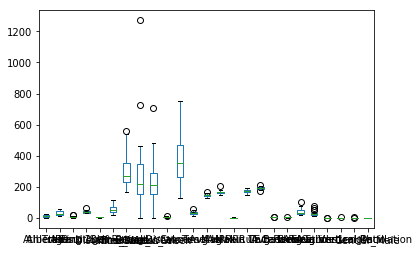

In [416]:
runners.plot.box()

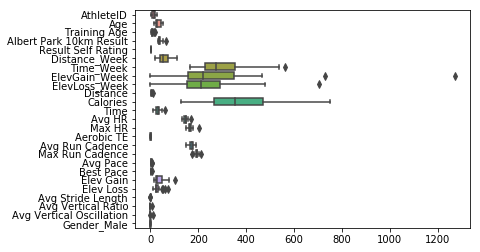

In [417]:
sns.boxplot(data=runners,orient="h")

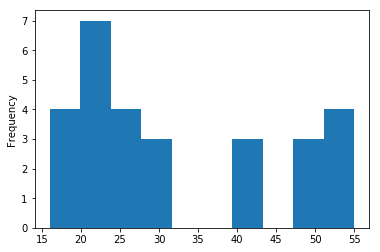

In [418]:
runners['Age'].plot.hist()

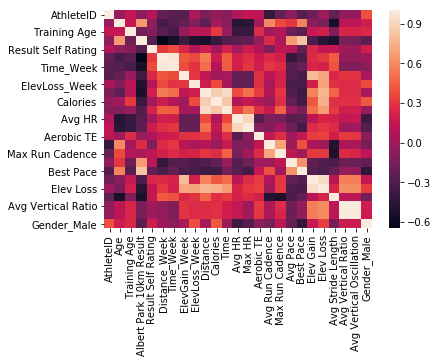

In [419]:
sns.heatmap(runners.corr())

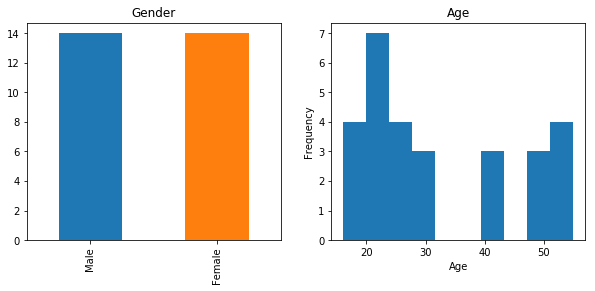

In [420]:
#runners[['AthleteID','Gender_Male']].groupby(['Gender_Male']).count().plot(kind='bar')
#runners['Gender'].value_counts().plot.bar()

fig, ax = plt.subplots(1,2)
runners['Gender'].value_counts().plot.bar(ax = ax[0])
ax[0].set_title('Gender')
runners['Age'].plot.hist(ax = ax[1])
ax[1].set_title('Age')
ax[1].set_xlabel('Age')
fig.set_figwidth(10)
#fig.suptitle('Two variables');

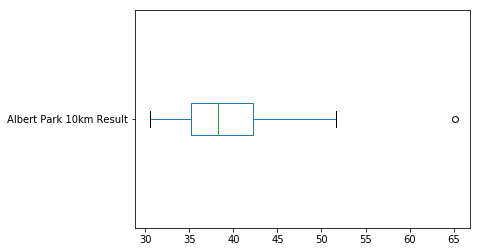

In [421]:
runners['Albert Park 10km Result'].plot.box(vert=False)
#sns.boxplot(data=runners['Albert Park 10km Result'],orient="h")

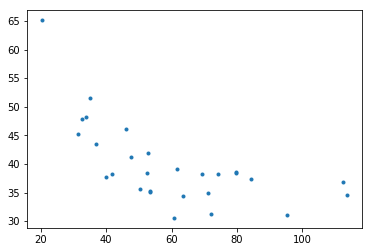

In [422]:
# create a matplotlib figure
plt.figure()
# generate a scatterplot inside the figure
plt.plot(runners['Distance_Week'], runners['Albert Park 10km Result'], '.')
# show the plot
plt.show()

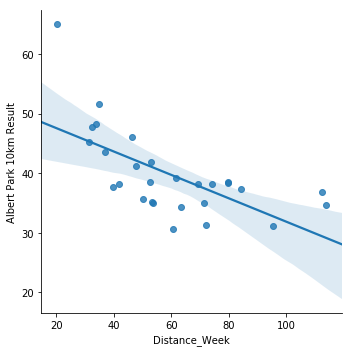

In [423]:
sns.lmplot('Distance_Week', 'Albert Park 10km Result', data = runners);

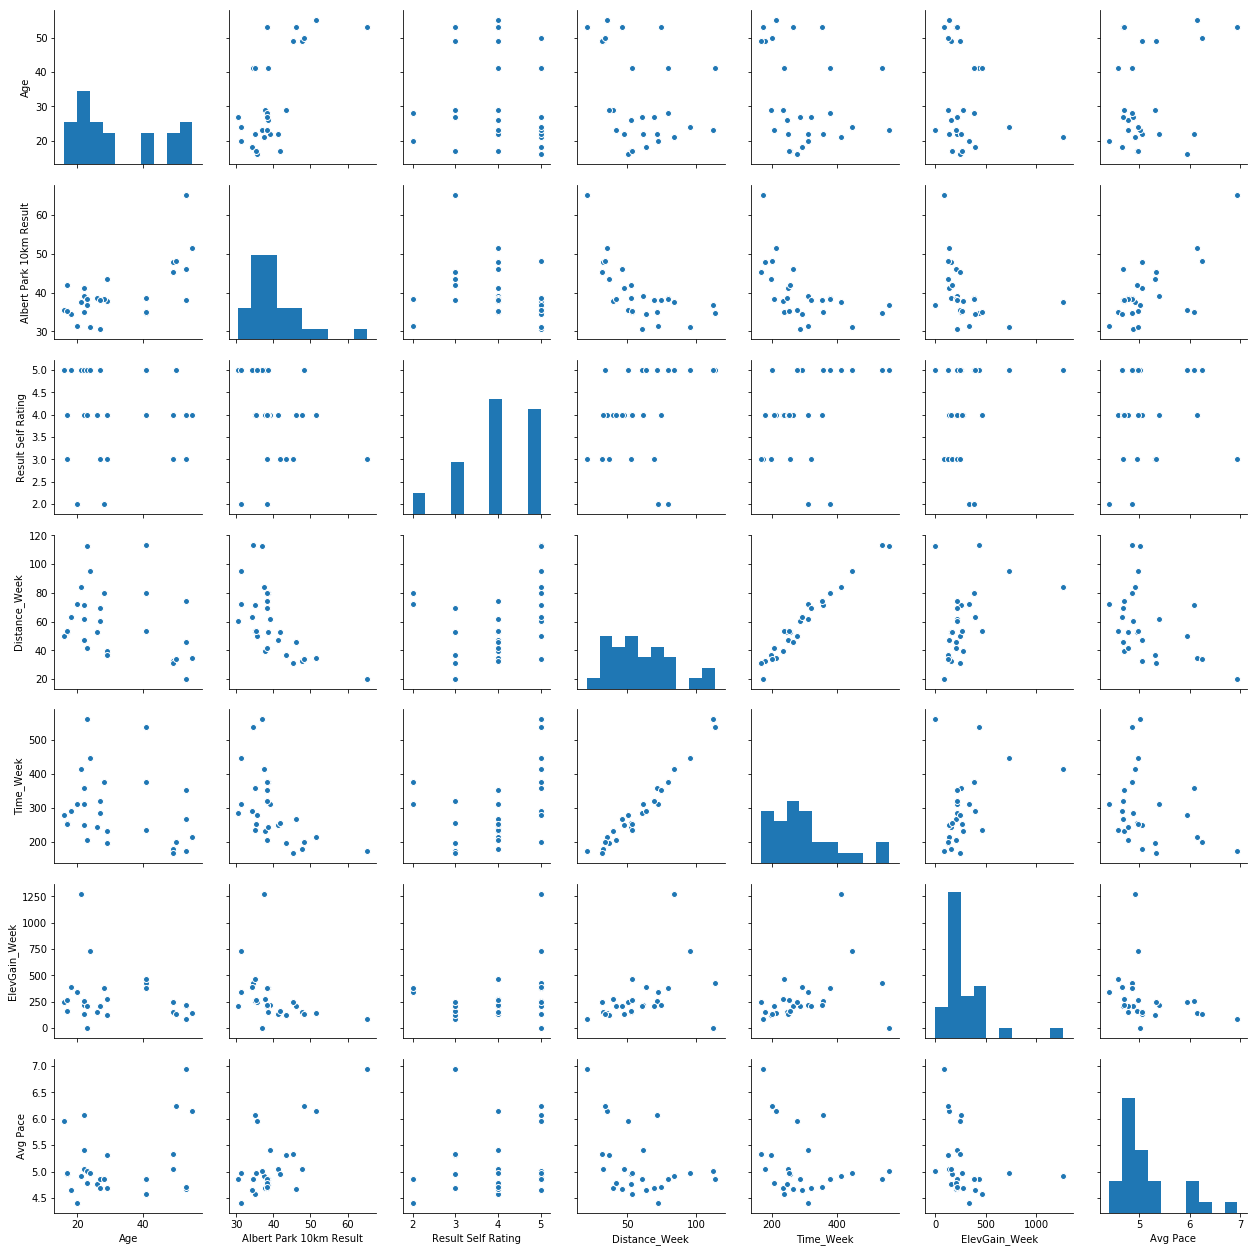

In [424]:
sns.pairplot(runners[['Age','Albert Park 10km Result','Result Self Rating','Distance_Week','Time_Week','ElevGain_Week','Avg Pace']])

## Standardising race results

After a bit of thinking I decided it would be very useful to standardise the race results using age grading. This gives us a fair comparison across all runners. A lot of work has gone into age grading race results for runners that you will find used in running events. I was able to retrieve the 2015 10km road standards from http://www.runscore.com/Alan/AgeGrade.html

The output of the age grading can be understood as:

| Age graded Percentage | guidelines as stated by the WMA |
| --- | --- |
| Above 100% | Usually, at least, a record setting performance for that age and distance |
| 100% | Approximate world record level |
| Above 90% | World Class Level |
| Above 80% | National Class Level |
| Above 70% | Regional Class Level |
| Above 60% | Local Class Level |

In [425]:
# Import 10km road standards
# Retrived from http://www.runscore.com/Alan/AgeGrade.html
femalestandards = pd.read_csv('FemaleRoadStd2015.csv')
malestandards = pd.read_csv('MaleRoadStd2015.csv')

In [426]:
agegrading = runners[['AthleteID','Gender','Age','Albert Park 10km Result']]
agegrading['ResultSeconds'] = agegrading['Albert Park 10km Result'] * 60

/Users/benmudie/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [427]:
agegradingfemale = agegrading[agegrading['Gender'] == 'Female']
agegradingfemale

,AthleteID,Gender,Age,Albert Park 10km Result,ResultSeconds
0,1,Female,21,37.433333,2246.0
1,2,Female,53,65.116667,3907.0
4,5,Female,29,37.716667,2263.0
5,6,Female,22,39.150000,2349.0
6,7,Female,55,51.600000,3096.0
8,9,Female,22,34.950000,2097.0
10,11,Female,41,38.566667,2314.0
11,12,Female,28,38.383333,2303.0
13,14,Female,22,41.200000,2472.0
14,15,Female,23,36.883333,2213.0


In [428]:
agegradingfemale = pd.merge(agegradingfemale, femalestandards, on='Age', how='inner')

In [429]:
agegradingfemale['AgeGrade'] = agegradingfemale['Standard'] / agegradingfemale['ResultSeconds']

In [430]:
agegradingfemale

,AthleteID,Gender,Age,Albert Park 10km Result,ResultSeconds,Standard,Factor,AgeGrade
0,1,Female,21,37.433333,2246.0,1820,1.0000,0.810329
1,2,Female,53,65.116667,3907.0,2132,0.8535,0.545687
2,5,Female,29,37.716667,2263.0,1820,1.0000,0.804242
3,16,Female,29,43.500000,2610.0,1820,1.0000,0.697318
4,6,Female,22,39.150000,2349.0,1820,1.0000,0.774798
5,9,Female,22,34.950000,2097.0,1820,1.0000,0.867907
6,14,Female,22,41.200000,2472.0,1820,1.0000,0.736246
7,7,Female,55,51.600000,3096.0,2186,0.8325,0.706072
8,11,Female,41,38.566667,2314.0,1886,0.9652,0.815039
9,12,Female,28,38.383333,2303.0,1820,1.0000,0.790274


In [431]:
agegradingmale = agegrading[agegrading['Gender'] == 'Male']
agegradingmale = pd.merge(agegradingmale, malestandards, on='Age', how='inner')
agegradingmale['AgeGrade'] = agegradingmale['Standard'] / agegradingmale['ResultSeconds']
agegradingmale

,AthleteID,Gender,Age,Albert Park 10km Result,ResultSeconds,Standard,Factor,AgeGrade
0,3,Male,20,31.300000,1878.0,1603,1.0000,0.853568
1,4,Male,41,34.616667,2077.0,1676,0.9566,0.806933
2,13,Male,41,35.050000,2103.0,1676,0.9566,0.796957
3,8,Male,26,38.483333,2309.0,1603,1.0000,0.694240
4,10,Male,27,30.566667,1834.0,1603,1.0000,0.874046
5,17,Male,53,46.166667,2770.0,1849,0.8669,0.667509
6,22,Male,53,38.200000,2292.0,1849,0.8669,0.806719
7,18,Male,24,31.150000,1869.0,1603,1.0000,0.857678
8,23,Male,49,47.800000,2868.0,1787,0.8968,0.623082
9,24,Male,49,45.250000,2715.0,1787,0.8968,0.658195


In [432]:
agegrading = pd.concat([agegradingfemale,agegradingmale])
agegrading = agegrading[['AthleteID','AgeGrade']]
runners = pd.merge(runners, agegrading, on='AthleteID')
runners

,AthleteID,Gender,Age,Training Age,Albert Park 10km Result,Result Self Rating,Data source,Notes,Distance_Week,Time_Week,...,Max Run Cadence,Avg Pace,Best Pace,Elev Gain,Elev Loss,Avg Stride Length,Avg Vertical Ratio,Avg Vertical Oscillation,Gender_Male,AgeGrade
0,1,Female,21,6,37.433333,5,Strava,NaN,84.180833,414.013889,...,NaN,4.907770,NaN,103.714286,NaN,NaN,NaN,NaN,0,0.810329
1,2,Female,53,6,65.116667,3,Garmin Connect,NaN,20.385833,173.346111,...,189.459184,6.943027,5.963776,17.238095,10.816327,0.826633,0.000000,0.000000,0,0.545687
2,3,Male,20,7,31.300000,2,Garmin Connect,NaN,72.073333,312.822222,...,192.243902,4.405488,3.148171,50.209877,49.426829,1.343171,0.000000,0.000000,1,0.853568
3,4,Male,41,6,34.616667,5,Garmin Connect,NaN,113.564167,538.052500,...,202.857143,4.863936,3.802571,31.518293,32.514124,1.115028,0.000000,0.000000,1,0.806933
4,5,Female,29,15,37.716667,4,Garmin Connect,Doesn't record warm up/cool down on Tues and T...,39.784167,233.135278,...,188.634921,4.691892,3.430423,53.677419,29.783784,1.339524,0.000000,0.000000,0,0.804242
5,6,Female,22,10,39.150000,4,Garmin Connect,NaN,61.570833,311.312222,...,195.279661,5.398623,3.914846,24.091743,22.319672,1.133033,0.000000,0.000000,0,0.774798
6,7,Female,55,7,51.600000,4,Garmin Connect,NaN,34.975833,214.612500,...,211.380000,6.145667,4.408333,47.885714,36.450980,0.836667,0.000000,0.000000,0,0.706072
7,8,Male,26,7,38.483333,4,Garmin Connect,NaN,52.523333,245.824167,...,186.023810,4.772667,3.754630,21.269663,15.960317,1.294841,0.000000,0.000000,1,0.694240
8,9,Female,22,7,34.950000,5,Garmin Connect,NaN,71.275000,358.107500,...,187.825397,6.077371,4.101587,26.102564,24.849206,1.265873,0.000000,0.000000,0,0.867907
9,10,Male,27,17,30.566667,5,Garmin Connect,NaN,60.672500,285.432917,...,196.247525,4.866502,3.100495,31.790123,23.613861,1.201584,0.000000,0.000000,1,0.874046


### Further looking at the data, now using age graded result as our dependent variable

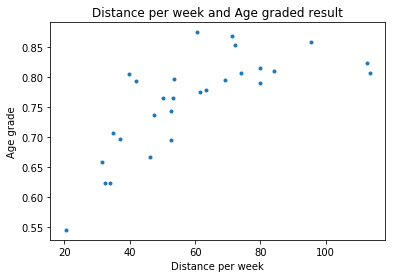

In [433]:
# create a matplotlib figure
plt.figure()
# generate a scatterplot inside the figure
plt.plot(runners['Distance_Week'], runners['AgeGrade'], '.',)
plt.xlabel('Distance per week')
plt.ylabel('Age grade')
plt.title('Distance per week and Age graded result')
# show the plot
plt.show()

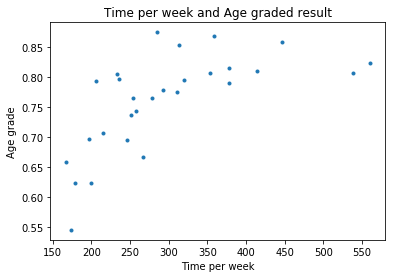

In [434]:
# create a matplotlib figure
plt.figure()
# generate a scatterplot inside the figure
plt.plot(runners['Time_Week'], runners['AgeGrade'], '.',)
plt.xlabel('Time per week')
plt.ylabel('Age grade')
plt.title('Time per week and Age graded result')
# show the plot
plt.show()

### Another idea: calculate intensity factor

Similar to our age grading, by calculating intensity factor it gives us a reasonably fair comparison of how intense each runner's training is.

To calculate this we need to first work out threshold pace which we can roughly do from 10km race result. I couldn't find a good mathemtical formula to use, so I've put each 10km result through an online calculator at https://runsmartproject.com/calculator/. This is the Jack Daniels Formula which is used by many coaches.

In [435]:
# Insert caclulated threshold paces (based on 10km result) based on jack daniels formula
# Used calculator at https://runsmartproject.com/calculator/ - difficult to find a formula to use
runners['ThresholdPace'] = ['3:53','6:32','3:16','3:36','3:54','4:03','5:14','3:59','3:38','3:12','3:59','3:58','3:38','4:14','3:49','4:28','4:44','3:15','3:57','4:19','3:57','3:57','4:53','4:38','3:34','4:56','3:41','3:39']

In [436]:
# Convert to decimal, re-using our function from earlier
runners['ThresholdPace'] = runners['ThresholdPace'].apply(convert_pace_decimal).apply(pd.to_numeric)
runners

,AthleteID,Gender,Age,Training Age,Albert Park 10km Result,Result Self Rating,Data source,Notes,Distance_Week,Time_Week,...,Avg Pace,Best Pace,Elev Gain,Elev Loss,Avg Stride Length,Avg Vertical Ratio,Avg Vertical Oscillation,Gender_Male,AgeGrade,ThresholdPace
0,1,Female,21,6,37.433333,5,Strava,NaN,84.180833,414.013889,...,4.907770,NaN,103.714286,NaN,NaN,NaN,NaN,0,0.810329,3.883333
1,2,Female,53,6,65.116667,3,Garmin Connect,NaN,20.385833,173.346111,...,6.943027,5.963776,17.238095,10.816327,0.826633,0.000000,0.000000,0,0.545687,6.533333
2,3,Male,20,7,31.300000,2,Garmin Connect,NaN,72.073333,312.822222,...,4.405488,3.148171,50.209877,49.426829,1.343171,0.000000,0.000000,1,0.853568,3.266667
3,4,Male,41,6,34.616667,5,Garmin Connect,NaN,113.564167,538.052500,...,4.863936,3.802571,31.518293,32.514124,1.115028,0.000000,0.000000,1,0.806933,3.600000
4,5,Female,29,15,37.716667,4,Garmin Connect,Doesn't record warm up/cool down on Tues and T...,39.784167,233.135278,...,4.691892,3.430423,53.677419,29.783784,1.339524,0.000000,0.000000,0,0.804242,3.900000
5,6,Female,22,10,39.150000,4,Garmin Connect,NaN,61.570833,311.312222,...,5.398623,3.914846,24.091743,22.319672,1.133033,0.000000,0.000000,0,0.774798,4.050000
6,7,Female,55,7,51.600000,4,Garmin Connect,NaN,34.975833,214.612500,...,6.145667,4.408333,47.885714,36.450980,0.836667,0.000000,0.000000,0,0.706072,5.233333
7,8,Male,26,7,38.483333,4,Garmin Connect,NaN,52.523333,245.824167,...,4.772667,3.754630,21.269663,15.960317,1.294841,0.000000,0.000000,1,0.694240,3.983333
8,9,Female,22,7,34.950000,5,Garmin Connect,NaN,71.275000,358.107500,...,6.077371,4.101587,26.102564,24.849206,1.265873,0.000000,0.000000,0,0.867907,3.633333
9,10,Male,27,17,30.566667,5,Garmin Connect,NaN,60.672500,285.432917,...,4.866502,3.100495,31.790123,23.613861,1.201584,0.000000,0.000000,1,0.874046,3.200000


#### Intensity Factor can be calculated by dividing pace for the run by threshold pace.

In [437]:
# Calculate Average Intensity Factor (how hard is training based on calculated threshold)
runners['AverageIntensity'] = (60/runners['Avg Pace']) / (60/runners['ThresholdPace'])
runners

,AthleteID,Gender,Age,Training Age,Albert Park 10km Result,Result Self Rating,Data source,Notes,Distance_Week,Time_Week,...,Best Pace,Elev Gain,Elev Loss,Avg Stride Length,Avg Vertical Ratio,Avg Vertical Oscillation,Gender_Male,AgeGrade,ThresholdPace,AverageIntensity
0,1,Female,21,6,37.433333,5,Strava,NaN,84.180833,414.013889,...,NaN,103.714286,NaN,NaN,NaN,NaN,0,0.810329,3.883333,0.791262
1,2,Female,53,6,65.116667,3,Garmin Connect,NaN,20.385833,173.346111,...,5.963776,17.238095,10.816327,0.826633,0.000000,0.000000,0,0.545687,6.533333,0.940992
2,3,Male,20,7,31.300000,2,Garmin Connect,NaN,72.073333,312.822222,...,3.148171,50.209877,49.426829,1.343171,0.000000,0.000000,1,0.853568,3.266667,0.741499
3,4,Male,41,6,34.616667,5,Garmin Connect,NaN,113.564167,538.052500,...,3.802571,31.518293,32.514124,1.115028,0.000000,0.000000,1,0.806933,3.600000,0.740141
4,5,Female,29,15,37.716667,4,Garmin Connect,Doesn't record warm up/cool down on Tues and T...,39.784167,233.135278,...,3.430423,53.677419,29.783784,1.339524,0.000000,0.000000,0,0.804242,3.900000,0.831221
5,6,Female,22,10,39.150000,4,Garmin Connect,NaN,61.570833,311.312222,...,3.914846,24.091743,22.319672,1.133033,0.000000,0.000000,0,0.774798,4.050000,0.750191
6,7,Female,55,7,51.600000,4,Garmin Connect,NaN,34.975833,214.612500,...,4.408333,47.885714,36.450980,0.836667,0.000000,0.000000,0,0.706072,5.233333,0.851549
7,8,Male,26,7,38.483333,4,Garmin Connect,NaN,52.523333,245.824167,...,3.754630,21.269663,15.960317,1.294841,0.000000,0.000000,1,0.694240,3.983333,0.834614
8,9,Female,22,7,34.950000,5,Garmin Connect,NaN,71.275000,358.107500,...,4.101587,26.102564,24.849206,1.265873,0.000000,0.000000,0,0.867907,3.633333,0.597846
9,10,Male,27,17,30.566667,5,Garmin Connect,NaN,60.672500,285.432917,...,3.100495,31.790123,23.613861,1.201584,0.000000,0.000000,1,0.874046,3.200000,0.657557


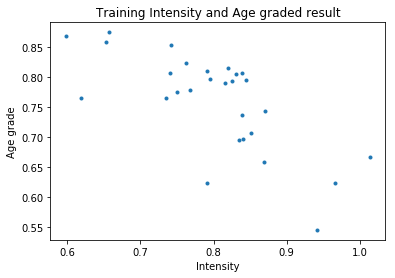

In [438]:
# create a matplotlib figure
plt.figure()
# generate a scatterplot inside the figure
plt.plot(runners['AverageIntensity'], runners['AgeGrade'], '.',)
plt.xlabel('Intensity')
plt.ylabel('Age grade')
plt.title('Training Intensity and Age graded result')
# show the plot
plt.show()

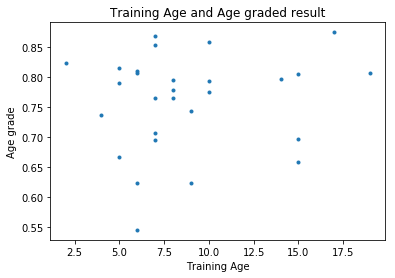

In [439]:
# create a matplotlib figure
plt.figure()
# generate a scatterplot inside the figure
plt.plot(runners['Training Age'], runners['AgeGrade'], '.',)
plt.xlabel('Training Age')
plt.ylabel('Age grade')
plt.title('Training Age and Age graded result')
# show the plot
plt.show()

### Re-looking at our correlations

Strong correlations between:

- Distance and time per week (makes sense)
- Calories and distance (makes sense) calories could be dropped
- Distance and time
- Avg HR and Max HR (could drop Max HR)
- Elev Gain and Elev Loss (what goes up must come down)
- Avg Vertical Oscillation and Avg Vertical Ratio (similar measure)
- Albert Park 10km Result and Threshold Pace (threshold pace is calculated from the 10km result)

Factors so far that appear to be most useful to look at in relation to our dependent variable (age grade):

- Distance per week
- Time per week
- Distance per run
- Avg Pace
- Best Pace
- Average Stride Length
- Average Intensity

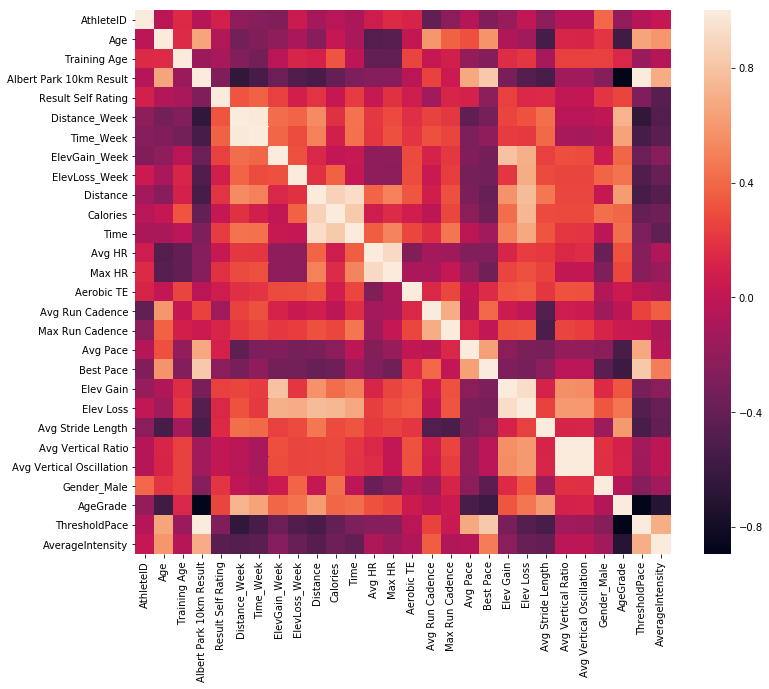

In [440]:
plt.figure(figsize=(12,10))
sns.heatmap(runners.corr())

### Long runs

In [441]:
# Find the longest run per week
# Exclude the week of the race, week 12, as the 10km race may be the longest run
longruns = activities[(activities['IsRun'] == 1) & (activities['Week'] != 12)].sort_values('Distance', ascending=False).drop_duplicates(['AthleteID','Week'])
#longruns.sort_values(['AthleteID','Week'])
longruns.groupby(['AthleteID'])['Distance','Time','Avg Pace'].mean()

,Distance,Time,Avg Pace
AthleteID,,,
1,19.806364,106.863636,5.390909
2,7.179091,53.719697,7.525758
3,17.779091,81.403030,4.562121
4,25.842727,118.474242,4.586364
5,14.295455,64.031818,4.469697
6,17.528182,89.600000,5.093939
7,11.261818,69.440909,6.165152
8,13.805455,63.322727,4.580303
9,14.231818,68.677273,4.859091


In [442]:
# Add long run fields to the runners dataframe
longruns_agg = longruns.groupby(['AthleteID'])['Distance','Time','Avg Pace'].mean()
longruns_agg = longruns_agg.rename(columns={'Distance':'LR_Distance','Time':'LR_Time','Avg Pace':'LR_Pace'})
runners = pd.merge(runners, longruns_agg, on='AthleteID')
# To calculate intensity we need to convert min per km to kilometers per hour = 60/mins per km
runners['LR_Intensity'] = (60/runners['LR_Pace']) / (60/runners['ThresholdPace'])

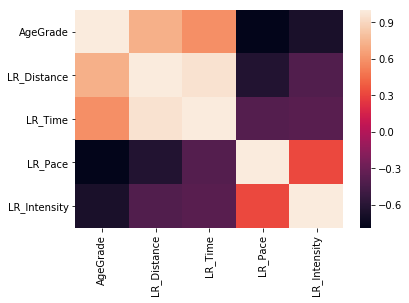

In [443]:
sns.heatmap(runners[['AgeGrade','LR_Distance','LR_Time','LR_Pace','LR_Intensity']].corr())

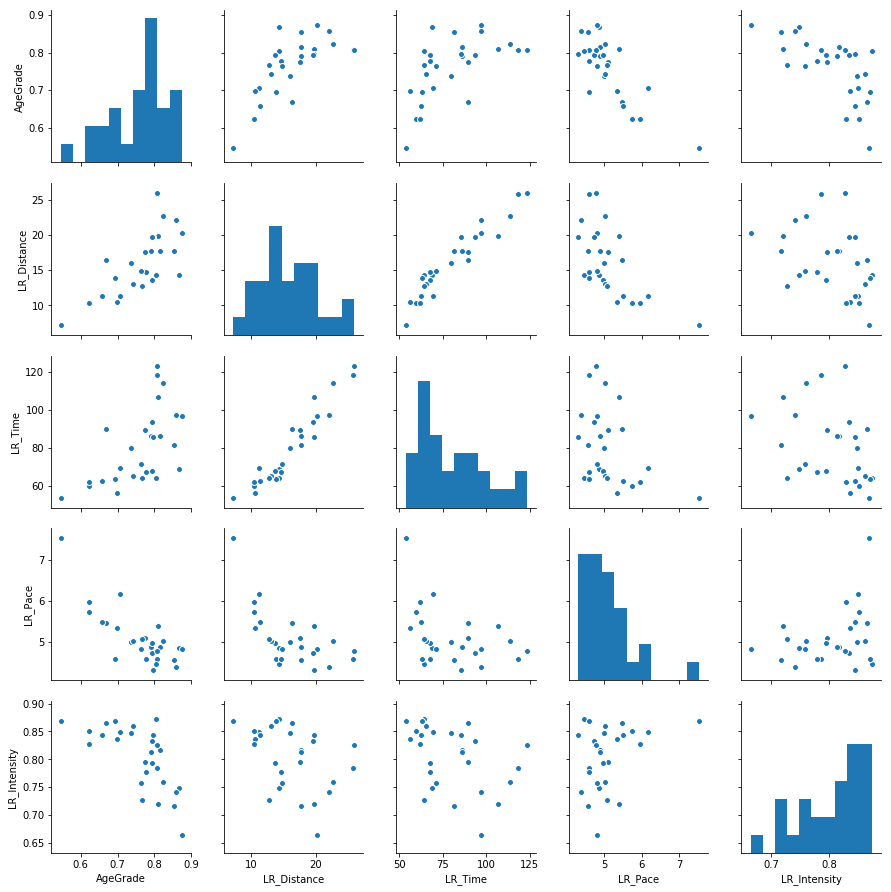

In [444]:
sns.pairplot(runners[['AgeGrade','LR_Distance','LR_Time','LR_Pace','LR_Intensity']])

In [446]:
runners[['AthleteID','AgeGrade','LR_Distance','LR_Time','LR_Pace','LR_Intensity','ThresholdPace']]

,AthleteID,AgeGrade,LR_Distance,LR_Time,LR_Pace,LR_Intensity,ThresholdPace
0,1,0.810329,19.806364,106.863636,5.390909,0.720349,3.883333
1,2,0.545687,7.179091,53.719697,7.525758,0.868130,6.533333
2,3,0.853568,17.779091,81.403030,4.562121,0.716041,3.266667
3,4,0.806933,25.842727,118.474242,4.586364,0.784936,3.600000
4,5,0.804242,14.295455,64.031818,4.469697,0.872542,3.900000
5,6,0.774798,17.528182,89.600000,5.093939,0.795062,4.050000
6,7,0.706072,11.261818,69.440909,6.165152,0.848857,5.233333
7,8,0.694240,13.805455,63.322727,4.580303,0.869666,3.983333
8,9,0.867907,14.231818,68.677273,4.859091,0.747739,3.633333
9,10,0.874046,20.254545,96.753030,4.818182,0.664151,3.200000


### Re-think of Intensity Factor

Adding it at the activity level as well as TSS

In [453]:
#add Threshold Pace to the activities table (temporarily)
activities = pd.merge(activities, runners[['AthleteID','ThresholdPace']], on='AthleteID')

In [461]:
activities['Intensity'] = (60/activities['Avg Pace']) / (60/activities['ThresholdPace'])

In [462]:
# Calculate TSS (training stress score)
# https://www.trainingpeaks.com/blog/running-training-stress-score-rtss-explained/
activities['TSS'] = (((activities['Time'] * 60) * (60/activities['Avg Pace']) * activities['Intensity']) / ((60/activities['ThresholdPace']) * 3600)) * 100

In [463]:
activities

,AthleteID,Activity Type,Date,Title,Distance,Calories,Time,Avg HR,Max HR,Aerobic TE,...,Elev Gain,Elev Loss,Avg Stride Length,Avg Vertical Ratio,Avg Vertical Oscillation,IsRun,Week,ThresholdPace,Intensity,TSS
0,1,walk,2018-07-22 14:14:00,Afternoon Walk,2.72,100.0,34.783333,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,12,3.883333,0.304575,5.377853
1,1,running,2018-07-22 09:58:00,Cool Down,2.68,151.0,13.666667,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1,12,3.883333,0.761438,13.206275
2,1,running,2018-07-22 08:59:00,ALBERT PARK!!! PB!!!,10.00,556.0,37.450000,NaN,NaN,NaN,...,35.0,NaN,NaN,NaN,NaN,1,12,3.883333,1.044843,68.140088
3,1,running,2018-07-22 08:34:00,Warm Up,1.77,97.0,10.216667,NaN,NaN,NaN,...,9.0,NaN,NaN,NaN,NaN,1,12,3.883333,0.675362,7.766612
4,1,running,2018-07-21 13:24:00,Afternoon Run,6.35,360.0,30.000000,NaN,NaN,NaN,...,85.0,NaN,NaN,NaN,NaN,1,12,3.883333,0.823322,33.892919
5,1,running,2018-07-20 12:54:00,"If you want to know when it will rain, just as...",10.09,573.0,48.816667,NaN,NaN,NaN,...,103.0,NaN,NaN,NaN,NaN,1,12,3.883333,0.803448,52.520967
6,1,running,2018-07-19 16:44:00,Afternoon Run ☔,12.26,683.0,62.200000,NaN,NaN,NaN,...,163.0,NaN,NaN,NaN,NaN,1,12,3.883333,0.779264,62.951865
7,1,running,2018-07-18 18:44:00,Cool Down,2.74,153.0,14.700000,NaN,NaN,NaN,...,17.0,NaN,NaN,NaN,NaN,1,12,3.883333,0.723602,12.828214
8,1,running,2018-07-18 18:15:00,7 Laps 100m on/100m off,2.94,168.0,11.300000,NaN,NaN,NaN,...,37.0,NaN,NaN,NaN,NaN,1,12,3.883333,1.008658,19.160863
9,1,running,2018-07-18 17:35:00,Warm Up,3.51,198.0,16.966667,NaN,NaN,NaN,...,25.0,NaN,NaN,NaN,NaN,1,12,3.883333,0.806228,18.380674


### Add new Intensity Factor and TSS aggregations to runners table

In [468]:
intensity_new = activities[(activities['IsRun'] == 1)].groupby(['AthleteID'], as_index=False)['Intensity'].mean()
runners = pd.merge(runners, intensity_new, on='AthleteID')

In [470]:
runners = runners.drop(['AverageIntensity'],axis=1)

In [473]:
tss_weekly_avg = activities[(activities['IsRun'] == 1)].groupby(by=['AthleteID','Week'],as_index=False).sum().groupby(['AthleteID'], as_index=False).mean()
tss_weekly_avg = tss_weekly_avg[['AthleteID','TSS']]
runners = pd.merge(runners, tss_weekly_avg, on='AthleteID')

In [477]:
runners = runners.rename(columns={'Intensity':'AverageIntensity','TSS':'TSSWeek'})
runners

,AthleteID,Gender,Age,Training Age,Albert Park 10km Result,Result Self Rating,Data source,Notes,Distance_Week,Time_Week,...,Avg Vertical Oscillation,Gender_Male,AgeGrade,ThresholdPace,LR_Distance,LR_Time,LR_Pace,LR_Intensity,AverageIntensity,TSSWeek
0,1,Female,21,6,37.433333,5,Strava,NaN,84.180833,414.013889,...,NaN,0,0.810329,3.883333,19.806364,106.863636,5.390909,0.720349,0.801385,435.718593
1,2,Female,53,6,65.116667,3,Garmin Connect,NaN,20.385833,173.346111,...,0.000000,0,0.545687,6.533333,7.179091,53.719697,7.525758,0.868130,0.964859,251.587339
2,3,Male,20,7,31.300000,2,Garmin Connect,NaN,72.073333,312.822222,...,0.000000,1,0.853568,3.266667,17.779091,81.403030,4.562121,0.716041,0.752987,298.529724
3,4,Male,41,6,34.616667,5,Garmin Connect,NaN,113.564167,538.052500,...,0.000000,1,0.806933,3.600000,25.842727,118.474242,4.586364,0.784936,0.754326,523.148636
4,5,Female,29,15,37.716667,4,Garmin Connect,Doesn't record warm up/cool down on Tues and T...,39.784167,233.135278,...,0.000000,0,0.804242,3.900000,14.295455,64.031818,4.469697,0.872542,0.837771,283.787998
5,6,Female,22,10,39.150000,4,Garmin Connect,NaN,61.570833,311.312222,...,0.000000,0,0.774798,4.050000,17.528182,89.600000,5.093939,0.795062,0.784798,336.359021
6,7,Female,55,7,51.600000,4,Garmin Connect,NaN,34.975833,214.612500,...,0.000000,0,0.706072,5.233333,11.261818,69.440909,6.165152,0.848857,0.858096,261.775830
7,8,Male,26,7,38.483333,4,Garmin Connect,NaN,52.523333,245.824167,...,0.000000,1,0.694240,3.983333,13.805455,63.322727,4.580303,0.869666,0.863229,323.557965
8,9,Female,22,7,34.950000,5,Garmin Connect,NaN,71.275000,358.107500,...,0.000000,0,0.867907,3.633333,14.231818,68.677273,4.859091,0.747739,0.746221,340.316978
9,10,Male,27,17,30.566667,5,Garmin Connect,NaN,60.672500,285.432917,...,0.000000,1,0.874046,3.200000,20.254545,96.753030,4.818182,0.664151,0.669506,223.303922


#### How do these new Intensity and Training Stress Scores look?

Possibly useful. Average Intensity fairly strong correlation with Age Grade. TSS per week slight correlation but doesn't appear that strong.

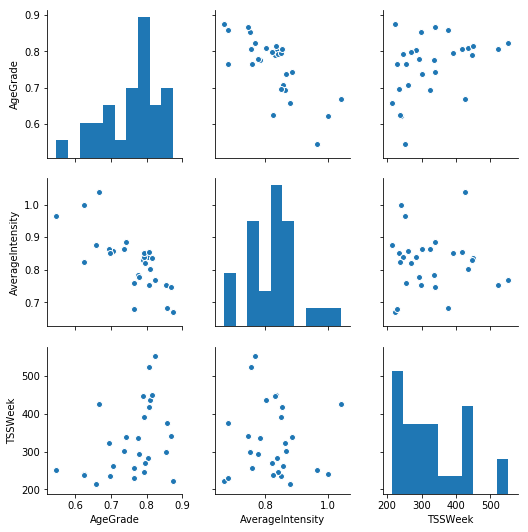

In [479]:
sns.pairplot(runners[['AgeGrade','AverageIntensity','TSSWeek']])

In [480]:
runners[['AgeGrade','AverageIntensity','TSSWeek']].corr()

,AgeGrade,AverageIntensity,TSSWeek
AgeGrade,1.000000,-0.739807,0.394479
AverageIntensity,-0.739807,1.000000,-0.043153
TSSWeek,0.394479,-0.043153,1.000000


### To do list

There are further training factors that I want to look at:

- Cross training: average number of minutes spent on activities other than running, many runner's have cycling, swimming, etc. in their datasets
- Number of days run per week
- Normalised Graded Pace (pace which takes into account elevation) - Note did a little bit of research and may be too difficult